# Comprehensive A/B Testing Analysis: Facebook vs. AdWords

## 📘 Introduction
Welcome to this data analysis notebook! In this project, we will compare the performance of two advertising campaigns: **Facebook** and **AdWords** (Google Ads).

### 🎯 Objective
Our goal is to determine which platform yields better results in terms of **Clicks**, **Conversions**, and overall **Cost Efficiency**.

### 🛠 Workflow
1. **Data Loading & Inspection**: Understanding our dataset.
2. **Data Cleaning**: Formatting the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Visualizing trends and distributions.
4. **Hypothesis Testing**: Statistically proving which campaign is better.
5. **Regression Analysis**: Predicting future conversions.
6. **Time Series Analysis**: Identifying weekly and monthly patterns.

## 1. Import Libraries
We start by importing the necessary tools:
- **Pandas**: For handling tabular data (the dataset).
- **Matplotlib / Seaborn**: For creating charts and graphs.
- **Scikit-learn**: For building machine learning models (Regression).
- **Statsmodels/Scipy**: For statistical testing (T-Test).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
from scipy import stats
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

## 2. Load Data & Initial Inspection
Here we load the CSV file into a proper DataFrame. We will inspect:
- **.head()**: The first 5 rows to see what the data looks like.
- **.info()**: To check data types (strings vs numbers) and missing values.
- **.describe()**: For a quick statistical summary (mean, max, min).

In [2]:
# Load the dataset
df = pd.read_csv('/Users/piyushpanthi/Documents/Data Analytics/A_B_Testing/A_B_testing_dataset.csv') 

# Display first few rows to understand structure
print("--- First 5 Rows ---")
display(df.head())

# Check shape of data (Rows, Columns)
print("\n--- Dataset Shape ---")
print(df.shape)

# Check data types and information regarding missing values
print("\n--- Data Info ---")
print(df.info())

# Statistical summary of numerical columns
print("\n--- Statistical Summary ---")
display(df.describe())

--- First 5 Rows ---


,date_of_campaign_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57



--- Dataset Shape ---
(1000, 17)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_of_campaign_of_campaign  1000 non-null   object 
 1   facebook_ad_campaign          1000 non-null   object 
 2   facebook_ad_views             1000 non-null   int64  
 3   facebook_ad_clicks            1000 non-null   int64  
 4   facebook_ad_conversions       1000 non-null   int64  
 5   facebook_cost_per_ad          1000 non-null   int64  
 6   facebook_ctr                  1000 non-null   float64
 7   facebook_conversion_rate      1000 non-null   float64
 8   facebook_cost_per_click       1000 non-null   float64
 9   adword_ad_campaign            1000 non-null   object 
 10  adword_ad_views               1000 non-null   int64  
 11  adword_ad_clicks              1000 non-null   int64  
 12  adword_ad_

,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
std,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846
min,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000


## 3. Data Cleaning
Real-world data is often "messy". 
- Columns like `Cost` or `CTR` might contain symbols like `$` or `%`.
- Python reads these as **Strings** (text), but we need them as **Floats** (numbers) for calculation.
- We also need to convert the `Date` column to a datetime object for time-based analysis.

In [3]:
# Convert 'Date' column to datetime objects
df['date_of_campaign_of_campaign'] = pd.to_datetime(df['date_of_campaign_of_campaign'])

# Function to remove '$' and ',' from currency columns
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Function to remove '%' from percentage columns
def clean_percentage(x):
    if isinstance(x, str):
        return float(x.replace('%', ''))
    return x

# Apply cleaning to Facebook columns
df['facebook_cost_per_ad'] = df['facebook_cost_per_ad'].apply(clean_currency)
df['facebook_ctr'] = df['facebook_ctr'].apply(clean_percentage)
df['facebook_conversion_rate'] = df['facebook_conversion_rate'].apply(clean_percentage)
df['facebook_cost_per_click'] = df['facebook_cost_per_click'].apply(clean_currency)

# Apply cleaning to AdWords columns
df['adword_cost_per_ad'] = df['adword_cost_per_ad'].apply(clean_currency)
df['adword_ctr'] = df['adword_ctr'].apply(clean_percentage)
df['adword_conversion_rate'] = df['adword_conversion_rate'].apply(clean_percentage)
df['adword_cost_per_click'] = df['adword_cost_per_click'].apply(clean_currency)

# Verify that data types are now correct (float64 or datetime)
print("--- Data Types After Cleaning ---")
print(df.dtypes)

--- Data Types After Cleaning ---
date_of_campaign_of_campaign    datetime64[ns]
facebook_ad_campaign                    object
facebook_ad_views                        int64
facebook_ad_clicks                       int64
facebook_ad_conversions                  int64
facebook_cost_per_ad                     int64
facebook_ctr                           float64
facebook_conversion_rate               float64
facebook_cost_per_click                float64
adword_ad_campaign                      object
adword_ad_views                          int64
adword_ad_clicks                         int64
adword_ad_conversions                    int64
adword_cost_per_ad                       int64
adword_ctr                             float64
adword_conversion_rate                 float64
adword_cost_per_click                  float64
dtype: object


## 4. Exploratory Data Analysis (EDA)
### Distributions
We use **Histograms** to see the frequency distribution of our data.
- **Normal Distribution (Bell Curve)**: Data is symmetric around the mean.
- **Skewed**: Data leans to one side.

This helps us decide which statistical tests to use later.

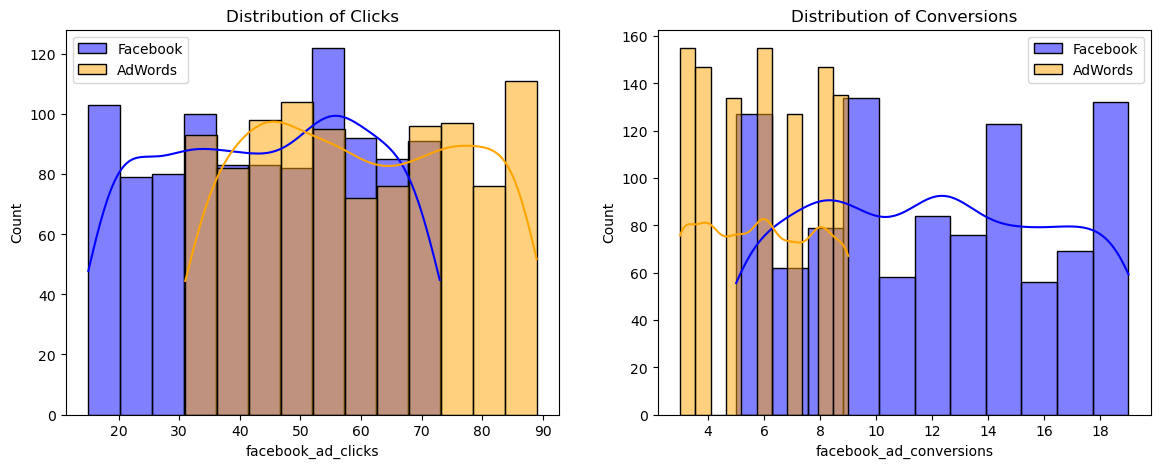

In [4]:
# Comparing distribution of Clicks and Conversions
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Clicks
sns.histplot(df['facebook_ad_clicks'], kde=True, color='blue', label='Facebook', ax=ax[0])
sns.histplot(df['adword_ad_clicks'], kde=True, color='orange', label='AdWords', ax=ax[0])
ax[0].set_title('Distribution of Clicks')
ax[0].legend()

# Histogram for Conversions
sns.histplot(df['facebook_ad_conversions'], kde=True, color='blue', label='Facebook', ax=ax[1])
sns.histplot(df['adword_ad_conversions'], kde=True, color='orange', label='AdWords', ax=ax[1])
ax[1].set_title('Distribution of Conversions')
ax[1].legend()

plt.show()

### Boxplots for Comparison
Let's look at the "spread" of the data more clearly. Boxplots show us:
- The **Median** (middle value).
- The **Interquartile Range** (where the middle 50% of data lies).
- **Outliers** (dots outside the whiskers).

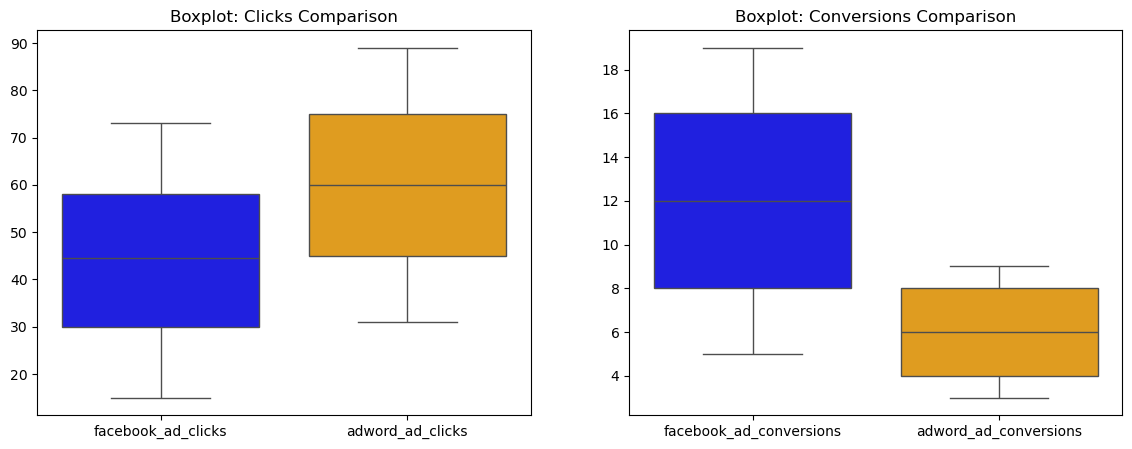

In [5]:
# Prepare data for boxplot visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df[['facebook_ad_clicks', 'adword_ad_clicks']], ax=ax[0], palette=['blue', 'orange'])
ax[0].set_title('Boxplot: Clicks Comparison')

sns.boxplot(data=df[['facebook_ad_conversions', 'adword_ad_conversions']], ax=ax[1], palette=['blue', 'orange'])
ax[1].set_title('Boxplot: Conversions Comparison')

plt.show()

## 5. Correlation Analysis
We want to know: **Does getting more Clicks actually lead to more Conversions?**
- **Correlation = 1**: Perfect positive relationship (More clicks = More conversions).
- **Correlation = 0**: No relationship.
- **Correlation = -1**: Negative relationship.

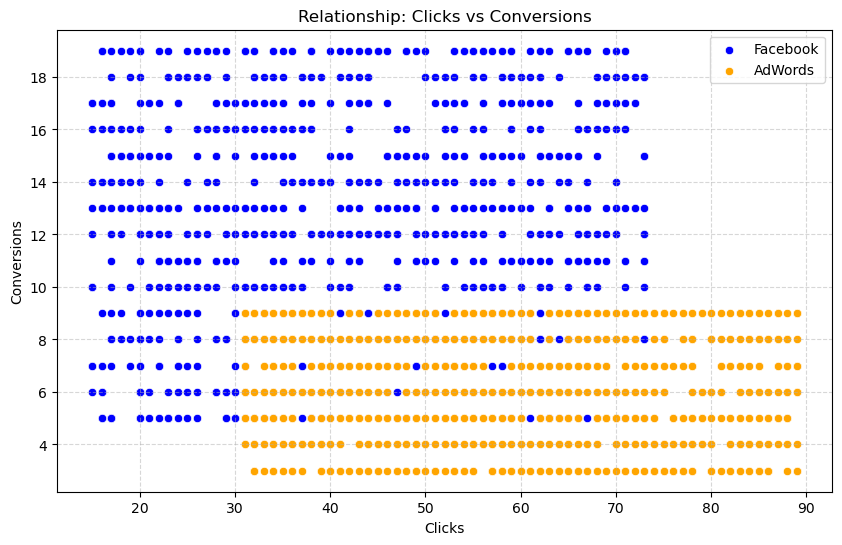

Correlation - Facebook (Clicks -> Conversions): -0.0050
Correlation - AdWords  (Clicks -> Conversions): 0.0042


In [6]:
# Scatter plot to check relationship between Clicks and Conversions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='facebook_ad_clicks', y='facebook_ad_conversions', data=df, label='Facebook', color='blue')
sns.scatterplot(x='adword_ad_clicks', y='adword_ad_conversions', data=df, label='AdWords', color='orange')
plt.title('Relationship: Clicks vs Conversions')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate Correlation Coefficient
fb_corr = df['facebook_ad_clicks'].corr(df['facebook_ad_conversions'])
adwords_corr = df['adword_ad_clicks'].corr(df['adword_ad_conversions'])

print(f"Correlation - Facebook (Clicks -> Conversions): {fb_corr:.4f}")
print(f"Correlation - AdWords  (Clicks -> Conversions): {adwords_corr:.4f}")

## 6. A/B Testing (Hypothesis Testing)
Now we determine if the difference we see is **statistically significant** or just due to chance.

- **Null Hypothesis (H0)**: There is NO difference between Facebook and AdWords.
- **Alternative Hypothesis (H1)**: There IS a significant difference.

We use a **T-Test**. If the **P-Value < 0.05**, we reject the Null Hypothesis (meaning the difference is real).

In [7]:
# Calculate mean conversions for context
print("Mean Facebook Conversions:", df['facebook_ad_conversions'].mean())
print("Mean AdWords Conversions:", df['adword_ad_conversions'].mean())

# Perform T-Test (Independent samples)
t_stat, p_val = stats.ttest_ind(df['facebook_ad_conversions'], df['adword_ad_conversions'])

print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_val}")

print("\n--- Conclusion ---")
if p_val < 0.05:
    print("✅ Result: Reject Null Hypothesis. There is a SIGNIFICANT difference between campaigns.")
else:
    print("❌ Result: Fail to reject Null Hypothesis. No significant difference found.")

Mean Facebook Conversions: 11.975
Mean AdWords Conversions: 5.933

T-statistic: 40.25906231407935
P-value: 5.194664900444369e-260

--- Conclusion ---
✅ Result: Reject Null Hypothesis. There is a SIGNIFICANT difference between campaigns.


## 7. Regression Analysis (Forecasting)
Since Facebook showed a strong correlation, can we **predict** conversions based on future clicks?
We train a **Linear Regression** model:
- **X (Independent Variable)**: Clicks
- **y (Dependent Variable)**: Conversions

We evaluate the model using R-squared (Accuracy) and MSE (Error).

R-squared Score (Accuracy): 0.0000
Mean Squared Error: 18.4579


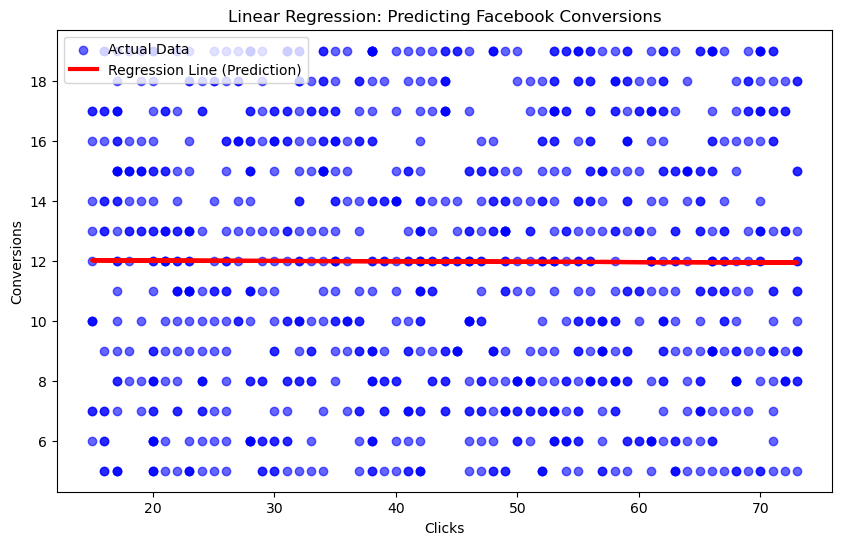

--- Future Predictions ---
If we get 50 clicks, we predict 11.97 conversions.
If we get 80 clicks, we predict 11.93 conversions.
If we get 100 clicks, we predict 11.90 conversions.


In [8]:
# Preparing Data for Regression (Using Facebook Data as it usually performs better in this dataset)
X = df[['facebook_ad_clicks']] # Independent Variable
y = df['facebook_ad_conversions'] # Dependent Variable

# Initialize and Fit Model
lm = LinearRegression()
lm.fit(X, y)

# Make Predictions across the existing data
predictions = lm.predict(X)

# Model Evaluation
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"R-squared Score (Accuracy): {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plotting Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, predictions, color='red', linewidth=3, label='Regression Line (Prediction)')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.title('Linear Regression: Predicting Facebook Conversions')
plt.legend()
plt.show()

# Interactive Prediction Example
clicks_to_predict = [[50], [80], [100]]
predicted_conversions = lm.predict(clicks_to_predict)

print("--- Future Predictions ---")
for i, clicks in enumerate(clicks_to_predict):
    print(f"If we get {clicks[0]} clicks, we predict {predicted_conversions[i]:.2f} conversions.")

## 8. Time Series Analysis
Finally, we analyze trends over time.
1. **Weekly Trends**: Which day of the week performs best? (Useful for ad scheduling)
2. **Monthly Trends**: Seasonality effects over the year.

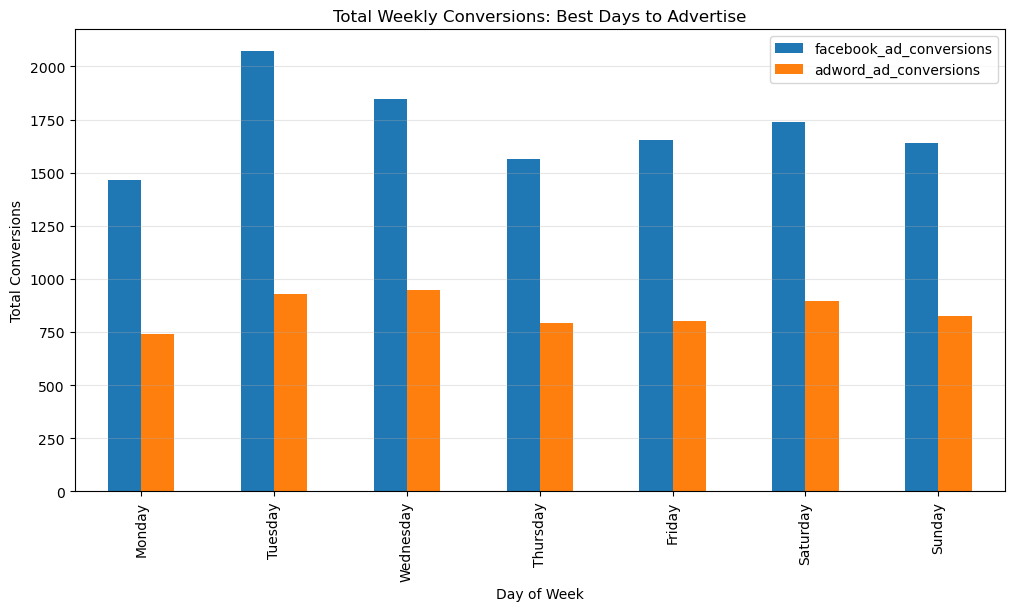

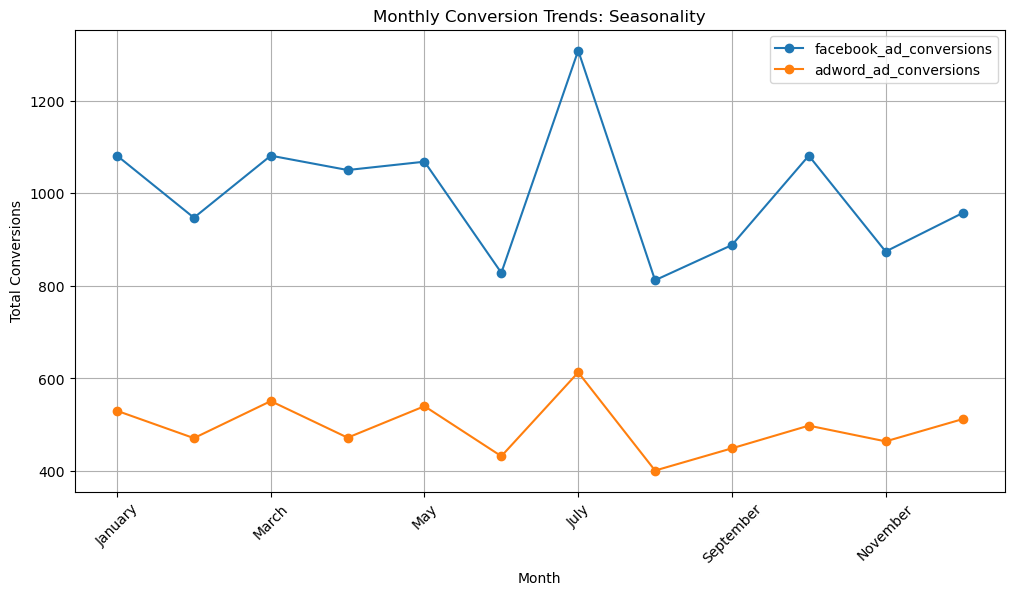

In [9]:
# Extract Month and Weekday names from Date
df['Month'] = df['date_of_campaign_of_campaign'].dt.month_name()
df['Day_of_Week'] = df['date_of_campaign_of_campaign'].dt.day_name()

# 1. Weekly Analysis
weekly_conv = df.groupby('Day_of_Week')[['facebook_ad_conversions', 'adword_ad_conversions']].sum()
# Reorder days for correct plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_conv = weekly_conv.reindex(days_order)

weekly_conv.plot(kind='bar', figsize=(12, 6))
plt.title('Total Weekly Conversions: Best Days to Advertise')
plt.xlabel('Day of Week')
plt.ylabel('Total Conversions')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 2. Monthly Analysis
monthly_conv = df.groupby('Month')[['facebook_ad_conversions', 'adword_ad_conversions']].sum()
# Reorder months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_conv = monthly_conv.reindex(months_order)

monthly_conv.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Conversion Trends: Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()